In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317130 sha256=e184d5736b5fa1dba5e331734bc6859dcbc69d7449352cf551d5c3b741adb85f
  Stored in directory: /root/.cache/pip/wheels/7b/1b/4b/3363a1d04368e7ff0d408e57ff57966fcdf00583774e761327
Successfully built pyspark


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
import pyspark.sql.functions as f
from pyspark.sql.functions import col
from pyspark.sql.functions import udf
from pyspark.sql.types import IntegerType, DoubleType


In [ ]:
#Lets put all of the functions we make in this code block

#Plots Graphs
def plot(teams1_vs_FG_row, xlabel, xlim, ylabel, ylim, title):

    x = []
    y = []
    for row in teams1_vs_FG_row:
        if(row[0] == None or row[1] == None):
            continue
        else:
            x.append(float(row[0]))
            y.append(float(row[1]))
    print(x)
    print(y)
    plt.scatter(np.array(x), np.array(y))
    plt.xlabel(xlabel)
    plt.xlim(xlim)
    plt.ylabel(ylabel)
    plt.ylim(ylim)
    plt.title(title)
    plt.show()

#Plots scoring by age
def plot_scoring_by_age(df):
    fig, graph = plt.subplots(nrows=1, ncols=4, figsize=(18, 6))

    metric = ['PTS', 'FG%', '3P%', 'AST','BLK','STL']
    graph_title = ['AVG PTS PER AGE', 'AVG FG% PER AGE', 'AVG 3P% PER AGE', 'AVG AST PER AGE', 'AVG BLK PER AGE','AVG STL PER AGE']
    x = []
    for i in range(4):
        stats = df.groupby('Age').mean(metric[i])
        stats = stats.filter(col(f'avg({metric[i]})').isNotNull())
        for row in stats.collect():
            x.append((row[0], row[1]))
        x = sorted(x, key=lambda a: a[0])
        graph[i].scatter(np.array(x)[:,0], np.array(x)[:,1])
        graph[i].set_title(graph_title[i])
        graph[i].set_xlabel('Age')
        graph[i].set_ylabel(f'Average {metric[i]}')
        x = []
    plt.tight_layout()
    plt.show()

#Plots scoring by position
def plot_scoring_by_pos(df):
    fig, graph = plt.subplots(nrows=1, ncols=4, figsize=(22, 6))
    new_df = df.replace(['SF-SG', 'SG-PG', 'PF-SF'], ['SF', 'SG', 'PF'], 'Pos')
    metric = ['PTS', 'FG%', '3P%', 'AST', 'BLK','STL']
    graph_title = ['AVG PTS PER POS', 'AVG FG% PER POS', 'AVG 3P% PER POS', 'AVG AST PER POS','AVG BLK PER POS','AVG STL PER POS']
    x = []
    for i in range(4):
        stats = new_df.groupby('Pos').mean(metric[i])
        stats = stats.filter(col(f'avg({metric[i]})').isNotNull())
        for row in stats.collect():
            x.append((row[0], round(row[1],2)))
        print(x)
        x = sorted(x, key=lambda a: a[1])
        graph[i].bar([a[0] for a in x], [a[1] for a in x], align='edge', alpha=0.5, width=0.5, bottom=0.0)
        graph[i].set_title(graph_title[i])
        graph[i].set_xlabel('Pos')
        graph[i].set_xlim(0, 5)
        graph[i].set_ylabel(f'Average {metric[i]}')
        x = []
    plt.tight_layout()
    plt.show()

#Plots negative stats by age
def plot_negatives_by_age(df):
    # Negative Attributes included in the dataframe are PF (player fouls) and TOV (turnovers)
    fig, graph = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
    metric = ['PF', 'TOV']
    graph_title = ['AVG PLAYER FOULS PER AGE', 'AVG TURNOVER RATE PER AGE']
    x = []
    for i in range(2):
        stats = df.groupby('Age').mean(metric[i])
        stats = stats.filter(col(f'avg({metric[i]})').isNotNull())
        for row in stats.collect():
            x.append((row[0], row[1]))
        x = sorted(x, key=lambda a: a[0])
        graph[i].scatter(np.array(x)[:,0], np.array(x)[:,1])
        graph[i].set_title(graph_title[i])
        graph[i].set_xlabel('Age')
        graph[i].set_ylabel(f'Average {metric[i]}')
        x = []
    plt.tight_layout()
    plt.show()

#Plots negative stats by positon
def plot_negatives_by_pos(df):
    # Negative Attributes included in the dataframe are PF (player fouls) and TOV (turnovers)
    fig, graph = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
    new_df = df.replace(['SF-SG', 'SG-PG', 'PF-SF'], ['SF', 'SG', 'PF'], 'Pos')
    metric = ['PF', 'TOV']
    graph_title = ['AVG PLAYER FOULS PER POS', 'AVG TURNOVER RATE PER POS']
    x = []
    for i in range(2):
        stats = new_df.groupby('Pos').mean(metric[i])
        stats = stats.filter(col(f'avg({metric[i]})').isNotNull())
        for row in stats.collect():
            x.append((row[0], round(row[1],2)))
        print(x)
        x = sorted(x, key=lambda a: a[1])
        graph[i].bar([a[0] for a in x], [a[1] for a in x], align='edge', alpha=0.5, width=0.5, bottom=0.0)
        graph[i].set_title(graph_title[i])
        graph[i].set_xlabel('Pos')
        graph[i].set_xlim(0, 5)
        graph[i].set_ylabel(f'Average {metric[i]}')
        x = []
    plt.tight_layout()
    plt.show()



[0.26, 0.0, 0.083, 0.396, 0.364, 0.404, 0.111, 0.336, 0.423, 0.27, 0.0, 0.333, 0.356, 0.294, 0.304, 0.243, 0.468, 0.376, 0.274, 0.416, 0.283, 0.0, 0.37, 0.301, 0.33, 0.38, 0.429, 0.364, 0.384, 0.4, 0.371, 0.319, 0.381, 0.5, 0.394, 0.402, 0.322, 0.0, 0.347, 0.414, 0.315, 0.25, 0.4, 0.6, 0.314, 0.391, 0.333, 0.464, 0.313, 0.38, 0.143, 0.336, 0.0, 0.0, 0.361, 0.401, 0.375, 0.42, 0.0, 0.321, 0.0, 0.167, 0.452, 0.273, 0.412, 0.0, 0.403, 0.34, 0.375, 0.0, 0.143, 0.419, 0.245, 0.167, 0.341, 0.0, 0.27, 0.256, 0.36, 0.348, 0.333, 0.405, 0.8, 0.083, 0.279, 0.423, 0.427, 0.333, 0.241, 0.25, 0.382, 0.0, 0.3, 0.297, 0.375, 0.307, 0.5, 0.267, 0.263, 0.279, 0.289, 0.416, 0.35, 0.5, 0.349, 0.318, 0.25, 0.273, 0.5, 0.352, 0.0, 0.301, 0.0, 0.286, 0.376, 0.0, 0.347, 0.363, 0.625, 0.338, 0.429, 0.378, 0.305, 0.304, 0.0, 0.324, 0.331, 0.309, 0.3, 0.421, 0.485, 0.361, 0.232, 0.384, 0.235, 0.309, 0.338, 0.158, 0.0, 0.382, 0.382, 0.407, 0.427, 0.33, 0.333, 0.349, 0.382, 0.25, 0.421, 0.392, 0.388, 0.351, 0.399

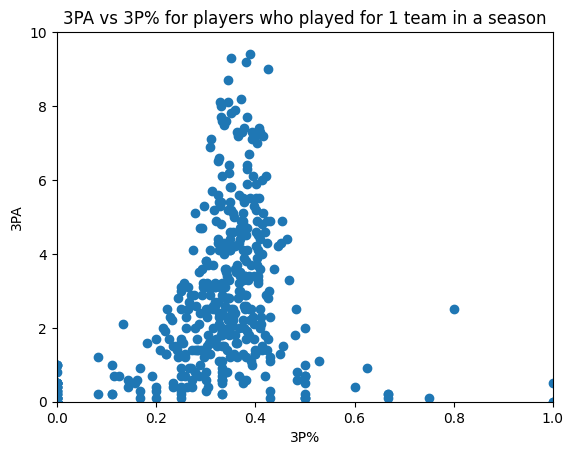

[0.412, 0.402, 0.5, 0.444, 0.333, 0.5, 0.385, 0.398, 0.222, 0.359, 0.359, 0.362, 0.341, 0.348, 0.167, 0.358, 0.345, 0.588, 0.333, 0.286, 1.0, 0.395, 0.387, 0.48, 0.431, 0.44, 0.0, 0.361, 0.362, 0.36, 0.394, 0.405, 0.286, 0.143, 0.167, 0.0, 0.0, 0.0, 0.342, 0.355, 0.231, 0.35, 0.347, 0.417, 0.343, 0.347, 0.327, 0.4, 0.375, 0.429, 0.322, 0.337, 0.276, 0.321, 0.34, 0.0, 0.351, 0.304, 0.632, 0.311, 0.311, 0.378, 0.345, 0.636, 0.38, 0.378, 0.444, 0.378, 0.374, 0.408, 0.349, 0.35, 0.333, 0.41, 0.455, 0.3, 0.0, 0.0, 0.423, 0.478, 0.0, 0.462, 0.447, 0.636, 0.361, 0.371, 0.0, 0.438, 0.438, 0.368, 0.0, 0.389, 0.346, 0.354, 0.263, 0.346, 0.342, 1.0, 0.325, 0.322, 0.5, 0.412, 0.408, 0.5, 0.395, 0.394, 0.4, 0.5, 0.6, 0.333, 0.337, 0.325, 0.375, 0.379, 0.392, 0.286, 0.0, 0.0, 0.326, 0.304, 0.367, 0.378, 0.364, 1.0, 0.349, 0.357, 0.273, 0.373, 0.381, 0.294, 0.389, 0.391, 0.353, 0.386, 0.371, 0.396, 0.39, 0.391, 0.375, 0.2, 0.167, 0.25, 0.222, 0.222, 0.354, 0.333, 0.438, 0.217, 0.2, 0.333, 0.339, 0.33

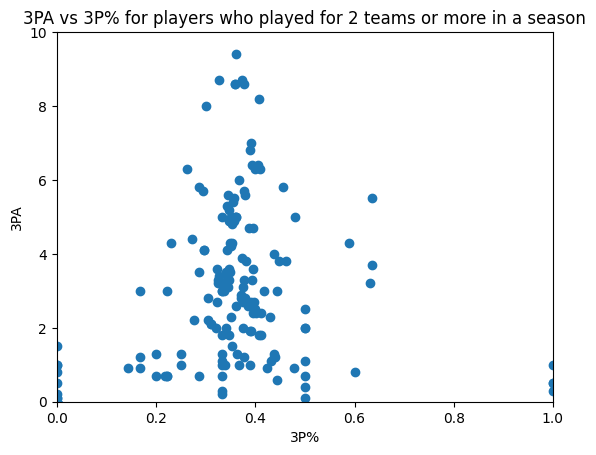

[0.557, 0.599, 0.543, 0.621, 0.601, 0.503, 0.664, 0.488, 0.527, 0.583, 0.313, 0.488, 0.514, 0.539, 0.6, 0.852, 0.593, 0.389, 0.45, 0.474, 0.502, 0.5, 0.636, 0.553, 0.499, 0.479, 0.395, 0.659, 0.536, 0.564, 0.469, 0.569, 0.506, 0.714, 0.6, 0.572, 0.495, 0.542, 0.645, 0.188, 0.529, 0.424, 0.585, 0.414, 0.5, 0.429, 0.55, 0.551, 0.451, 0.509, 0.447, 0.55, 0.476, 0.574, 0.667, 0.635, 0.0, 0.532, 0.507, 0.519, 0.463, 0.0, 0.544, 1.0, 0.632, 0.508, 0.0, 0.578, 0.626, 0.25, 0.449, 0.605, 0.514, 0.0, 1.0, 0.463, 0.415, 0.543, 0.67, 0.528, 0.718, 0.434, 0.624, 0.586, 0.527, 0.523, 0.497, 0.333, 0.516, 0.466, 0.518, 0.588, 0.516, 0.593, 0.357, 0.561, 0.4, 1.0, 0.576, 0.353, 0.529, 0.526, 0.636, 0.6, 0.632, 0.594, 0.482, 0.589, 1.0, 0.453, 0.583, 0.0, 0.5, 1.0, 0.48, 0.63, 0.434, 0.5, 0.625, 0.622, 0.647, 0.475, 0.518, 0.5, 0.566, 0.689, 0.36, 0.447, 0.432, 0.5, 0.408, 0.581, 0.527, 0.675, 0.747, 0.496, 0.549, 0.621, 0.496, 0.522, 0.598, 0.528, 0.532, 0.738, 0.684, 0.48, 0.645, 0.532, 0.563, 0.594

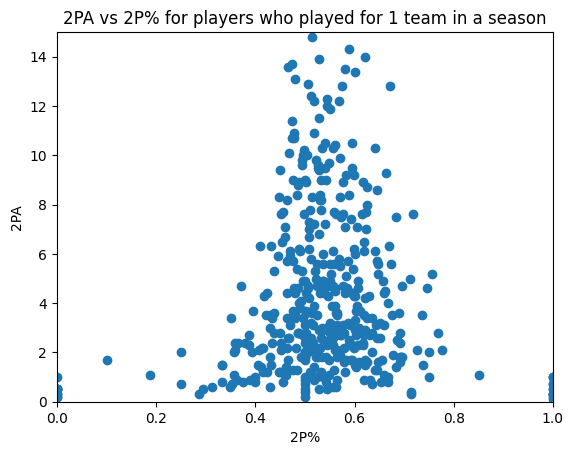

[0.546, 0.578, 0.357, 0.0, 0.0, 0.0, 0.591, 0.594, 0.5, 0.484, 0.485, 0.471, 0.506, 0.506, 0.5, 0.454, 0.46, 0.273, 0.6, 0.605, 0.5, 0.505, 0.503, 0.529, 0.679, 0.697, 0.45, 0.466, 0.469, 0.438, 0.5, 0.504, 0.462, 0.286, 0.333, 0.0, 0.526, 0.522, 0.667, 0.555, 0.559, 0.529, 0.523, 0.536, 0.2, 0.435, 0.463, 0.381, 0.0, 0.0, 0.0, 0.539, 0.545, 0.524, 0.516, 0.525, 0.333, 0.594, 0.594, 0.6, 0.621, 0.621, 0.462, 0.474, 0.0, 0.42, 0.425, 0.333, 0.571, 0.569, 0.59, 0.463, 0.469, 0.25, 0.545, 0.5, 0.68, 0.605, 0.588, 0.75, 0.6, 0.667, 0.25, 0.47, 0.494, 0.0, 0.656, 0.651, 1.0, 0.6, 1.0, 0.556, 0.462, 1.0, 0.435, 0.468, 0.467, 0.5, 0.467, 0.467, 0.529, 0.534, 0.444, 0.394, 0.394, 0.565, 0.541, 0.75, 0.333, 0.0, 0.429, 0.5, 0.488, 0.532, 0.402, 0.379, 0.529, 0.677, 0.669, 1.0, 0.633, 0.618, 0.755, 0.561, 0.55, 0.611, 0.27, 0.25, 1.0, 0.535, 0.518, 0.722, 0.503, 0.489, 0.667, 0.543, 0.546, 0.5, 0.333, 0.143, 0.6, 0.461, 0.45, 0.667, 0.615, 0.5, 0.8, 0.571, 0.553, 1.0, 0.541, 0.547, 0.5, 0.608, 0

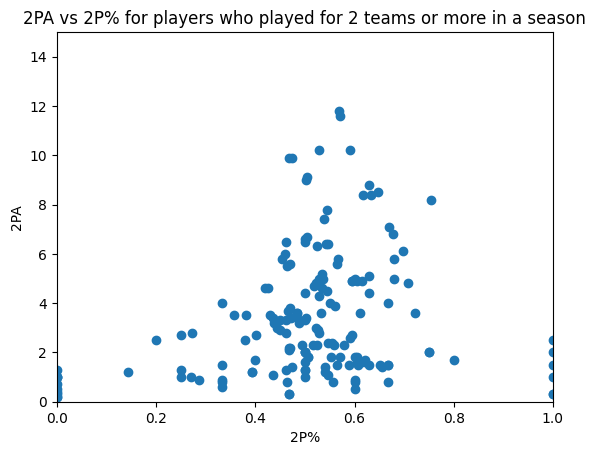

[2.1, 2.3, 2.8, 1.4, 1.9, 1.6, 2.2, 2.0, 2.1, 3.3, 0.5, 2.5, 3.0, 2.9, 2.8, 0.5, 2.0, 0.4, 3.3, 2.2, 2.4, 1.1, 1.9, 1.3, 2.2, 2.6, 1.0, 2.1, 1.0, 2.0, 1.0, 1.9, 1.5, 1.1, 1.2, 1.8, 0.0, 1.7, 1.9, 1.3, 0.7, 2.8, 1.0, 2.0, 1.1, 1.3, 0.2, 1.7, 1.2, 1.3, 1.6, 3.3, 2.4, 0.8, 2.7, 1.5, 1.1, 1.0, 1.5, 2.3, 2.3, 1.9, 0.0, 1.3, 0.2, 1.1, 2.1, 0.4, 1.6, 2.2, 0.5, 2.0, 3.0, 2.5, 0.0, 0.3, 0.5, 0.9, 0.8, 2.4, 2.0, 2.8, 1.2, 3.2, 3.2, 1.1, 1.9, 2.4, 2.5, 1.4, 2.8, 1.8, 2.2, 1.9, 2.7, 1.0, 1.9, 0.0, 0.5, 2.0, 0.6, 2.7, 0.7, 0.8, 2.2, 1.4, 1.2, 1.8, 2.6, 0.0, 3.2, 2.5, 1.5, 0.6, 0.0, 1.2, 1.9, 1.5, 1.6, 3.0, 2.4, 2.7, 2.2, 2.5, 0.7, 3.2, 2.2, 1.3, 1.0, 0.9, 0.9, 0.0, 1.9, 2.5, 2.0, 2.2, 2.3, 2.1, 1.7, 1.5, 1.2, 2.7, 1.9, 2.1, 2.7, 1.2, 2.9, 1.7, 1.9, 2.4, 1.0, 3.0, 1.7, 2.0, 1.7, 1.9, 2.6, 1.2, 1.9, 2.5, 1.2, 0.7, 1.6, 2.0, 1.3, 0.0, 1.5, 2.0, 2.4, 1.3, 2.0, 2.6, 1.3, 1.3, 1.4, 3.0, 1.4, 1.0, 1.7, 1.7, 2.0, 1.6, 0.2, 1.3, 1.9, 1.3, 1.9, 1.6, 1.2, 1.4, 0.2, 2.5, 3.0, 1.4, 1.7, 1.7, 2.6, 0.5, 3.1, 2.2,

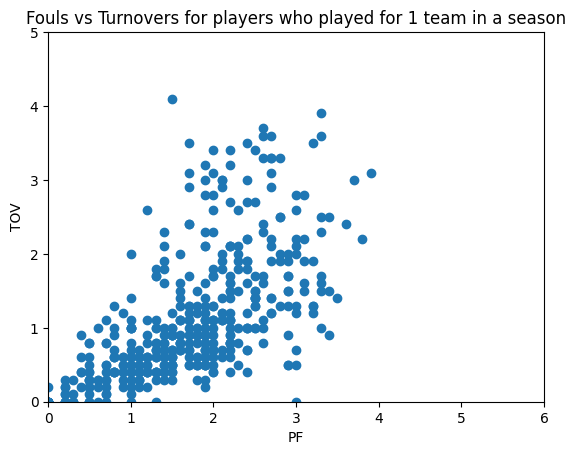

[1.5, 1.6, 0.8, 0.4, 0.3, 1.0, 2.3, 2.2, 3.7, 1.5, 1.4, 2.4, 2.7, 2.8, 2.5, 1.6, 1.7, 1.3, 1.6, 1.6, 1.0, 2.0, 2.1, 2.0, 1.8, 1.9, 1.5, 2.1, 2.2, 1.8, 2.4, 2.3, 2.5, 0.2, 0.2, 0.0, 2.1, 2.2, 0.5, 2.1, 2.0, 2.8, 1.0, 1.0, 1.5, 0.9, 0.9, 1.3, 1.5, 2.0, 1.0, 1.1, 1.3, 0.6, 0.8, 0.8, 0.5, 2.6, 2.6, 2.2, 1.1, 1.2, 0.0, 1.4, 1.3, 2.5, 1.6, 1.6, 2.3, 2.8, 2.7, 3.2, 1.8, 1.8, 2.0, 1.7, 1.7, 1.8, 0.9, 0.8, 2.0, 0.8, 0.8, 0.3, 1.4, 1.3, 2.0, 1.7, 1.8, 1.3, 0.6, 1.0, 0.6, 1.4, 0.5, 1.4, 1.6, 1.6, 2.0, 1.2, 1.2, 0.0, 2.8, 2.8, 2.2, 1.3, 1.2, 3.0, 1.7, 1.6, 2.0, 0.2, 0.1, 1.0, 0.9, 0.9, 1.1, 0.9, 0.9, 0.5, 2.9, 2.9, 3.0, 2.7, 2.6, 3.7, 1.7, 1.6, 2.2, 1.0, 1.0, 0.3, 1.9, 1.7, 3.8, 1.4, 1.3, 2.7, 2.1, 2.2, 1.3, 0.8, 1.2, 0.7, 1.9, 1.9, 1.8, 1.6, 2.0, 1.0, 0.9, 0.9, 1.0, 1.5, 1.3, 3.8, 1.6, 1.5, 2.0, 2.5, 2.6, 1.8, 1.6, 1.7, 0.5, 2.4, 2.3, 4.5, 2.0, 1.9, 2.5]
[1.2, 1.3, 1.0, 0.2, 0.1, 0.7, 0.6, 0.6, 1.0, 1.1, 1.1, 1.4, 0.9, 0.9, 1.0, 1.0, 1.0, 1.0, 0.5, 0.6, 0.0, 1.4, 1.4, 1.8, 0.7, 0.7, 1.0, 1.7, 1.7

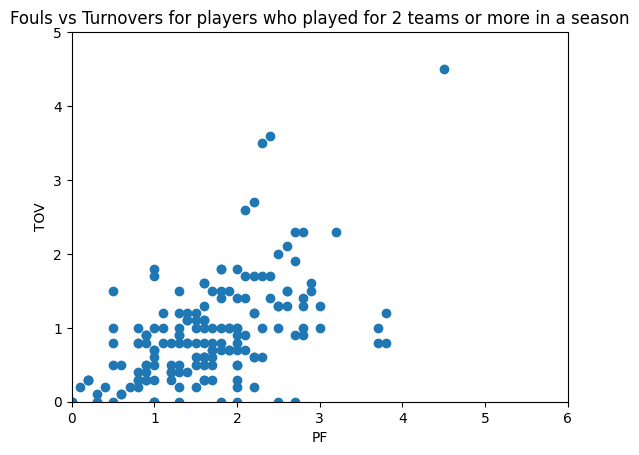

[0.7, 1.1, 0.8, 0.1, 0.7, 0.2, 1.2, 0.2, 0.9, 0.8, 0.1, 0.6, 0.8, 0.5, 0.8, 0.2, 0.7, 0.1, 0.3, 0.5, 0.4, 0.4, 0.2, 0.1, 0.9, 0.2, 0.3, 0.9, 0.3, 0.7, 0.8, 0.7, 0.1, 0.1, 0.3, 1.3, 0.0, 0.3, 0.1, 1.3, 0.1, 0.3, 0.0, 0.9, 0.2, 0.5, 0.1, 0.1, 0.2, 0.2, 0.3, 0.2, 0.6, 0.3, 0.4, 0.0, 0.4, 0.0, 0.1, 0.3, 0.2, 0.1, 0.0, 0.3, 0.3, 0.0, 0.5, 0.0, 0.3, 1.2, 0.2, 0.4, 0.6, 0.6, 0.0, 0.0, 0.2, 0.2, 0.2, 0.7, 0.2, 2.6, 0.1, 1.2, 0.6, 0.1, 0.8, 0.6, 0.0, 0.2, 0.6, 0.2, 0.4, 0.3, 2.0, 0.1, 0.3, 0.0, 0.3, 0.5, 0.0, 0.5, 0.3, 0.4, 0.3, 0.3, 0.3, 0.1, 0.5, 0.0, 0.3, 0.3, 0.0, 0.1, 0.0, 0.1, 0.3, 0.2, 0.1, 0.5, 1.5, 0.9, 0.6, 0.7, 0.1, 1.6, 1.2, 0.1, 0.2, 0.1, 0.1, 0.0, 0.1, 0.3, 0.4, 0.5, 1.3, 0.1, 0.5, 0.0, 0.3, 0.4, 0.3, 0.5, 1.1, 0.2, 1.3, 0.5, 0.8, 0.8, 0.0, 0.8, 0.2, 0.3, 0.7, 0.3, 0.1, 0.1, 0.2, 0.4, 0.4, 0.0, 0.1, 0.6, 0.1, 0.0, 0.5, 0.2, 0.2, 0.1, 0.5, 0.8, 0.2, 0.3, 0.3, 0.4, 0.2, 0.1, 0.4, 0.3, 0.3, 0.3, 0.0, 0.2, 0.4, 0.3, 0.9, 0.5, 0.2, 0.1, 0.0, 0.3, 0.2, 0.4, 0.3, 0.1, 0.4, 0.4, 0.3, 1.5,

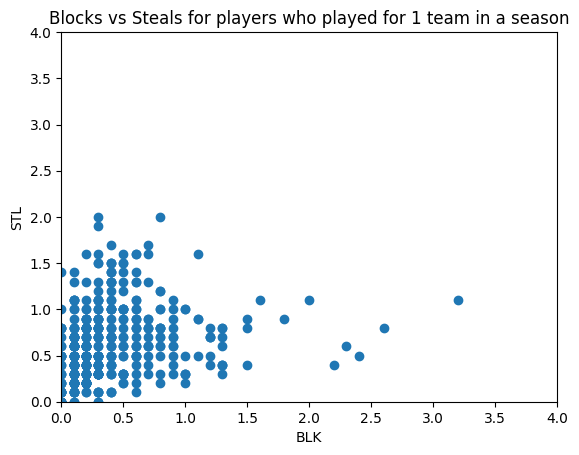

[0.4, 0.4, 0.5, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.1, 0.1, 0.0, 0.6, 0.6, 0.5, 0.2, 0.2, 0.3, 0.5, 0.5, 0.0, 0.8, 0.8, 1.0, 0.6, 0.6, 0.5, 0.2, 0.2, 0.2, 0.3, 0.3, 0.0, 0.1, 0.1, 0.0, 0.9, 1.0, 0.0, 0.4, 0.5, 0.0, 0.4, 0.4, 0.8, 0.2, 0.2, 0.7, 0.2, 0.0, 0.3, 0.3, 0.4, 0.2, 0.2, 0.2, 0.5, 0.2, 0.2, 0.5, 0.1, 0.1, 0.0, 0.4, 0.4, 1.5, 0.3, 0.3, 0.0, 0.8, 0.8, 0.5, 0.1, 0.1, 0.3, 0.4, 0.4, 0.4, 0.6, 0.5, 1.0, 0.1, 0.0, 0.7, 0.1, 0.1, 0.0, 0.3, 0.3, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.1, 0.2, 0.2, 0.7, 0.1, 0.1, 0.0, 0.5, 0.5, 0.0, 0.2, 0.2, 0.0, 0.4, 0.4, 0.5, 0.0, 0.0, 0.0, 0.1, 0.1, 0.0, 0.2, 0.2, 0.0, 0.6, 0.6, 0.8, 1.2, 1.1, 2.0, 0.4, 0.4, 0.2, 0.1, 0.1, 0.0, 0.3, 0.3, 0.6, 0.2, 0.2, 0.0, 0.4, 0.4, 0.0, 0.0, 0.0, 0.1, 0.1, 0.1, 0.0, 0.4, 0.6, 0.0, 0.2, 0.2, 0.0, 0.3, 0.3, 1.0, 0.2, 0.2, 0.3, 0.3, 0.3, 0.2, 0.3, 0.3, 0.0, 0.4, 0.4, 0.0, 0.3, 0.3, 0.3]
[0.6, 0.7, 0.3, 0.1, 0.2, 0.0, 0.3, 0.3, 0.0, 0.9, 0.8, 1.8, 0.9, 0.9, 0.0, 0.9, 1.0, 0.5, 0.4, 0.4, 0.0, 1.2, 1.2, 1.2, 0.3, 0.3, 0.2, 1.0, 1.0

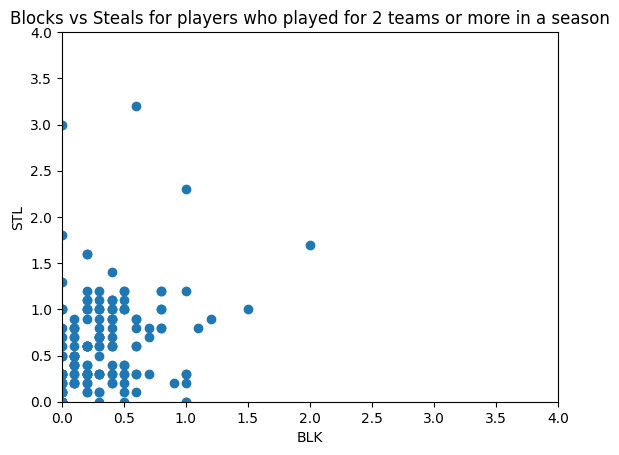

[23.0, 29.0, 25.0, 22.0, 22.0, 24.0, 24.0, 24.0, 27.0, 24.0, 24.0, 29.0, 28.0, 30.0, 22.0, 25.0, 28.0, 28.0, 28.0, 22.0, 24.0, 23.0, 23.0, 20.0, 21.0, 24.0, 24.0, 24.0, 20.0, 24.0, 23.0, 19.0, 30.0, 21.0, 22.0, 32.0, 22.0, 27.0, 34.0, 22.0, 29.0, 26.0, 26.0, 26.0, 22.0, 30.0, 34.0, 34.0, 34.0, 23.0, 23.0, 23.0, 30.0, 23.0, 23.0, 23.0, 30.0, 23.0, 30.0, 33.0, 23.0, 22.0, 26.0, 21.0, 30.0, 22.0, 23.0, 25.0, 19.0, 21.0, 26.0, 26.0, 26.0, 24.0, 30.0, 27.0, 26.0, 21.0, 26.0, 19.0, 23.0, 27.0, 23.0, 26.0, 25.0, 25.0, 25.0, 31.0, 31.0, 29.0, 33.0, 20.0, 23.0, 29.0, 31.0, 25.0, 28.0, 21.0, 27.0, 23.0, 28.0, 21.0, 21.0, 20.0, 19.0, 21.0, 26.0, 30.0, 23.0, 25.0, 25.0, 25.0, 35.0, 35.0, 35.0, 30.0, 32.0, 32.0, 32.0, 23.0, 21.0, 32.0, 34.0, 19.0, 29.0, 20.0, 25.0, 20.0, 23.0, 33.0, 32.0, 33.0, 21.0, 26.0, 24.0, 33.0, 19.0, 29.0, 29.0, 29.0, 26.0, 23.0, 26.0, 23.0, 23.0, 23.0, 25.0, 26.0, 36.0, 29.0, 25.0, 23.0, 28.0, 34.0, 19.0, 21.0, 21.0, 22.0, 22.0, 22.0, 23.0, 28.0, 25.0, 24.0, 24.0, 24.0, 29.

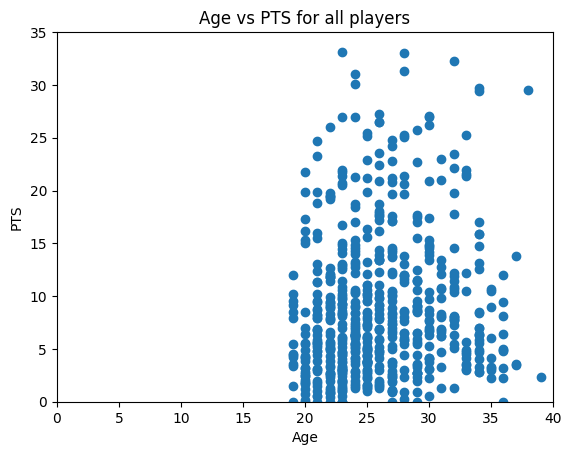

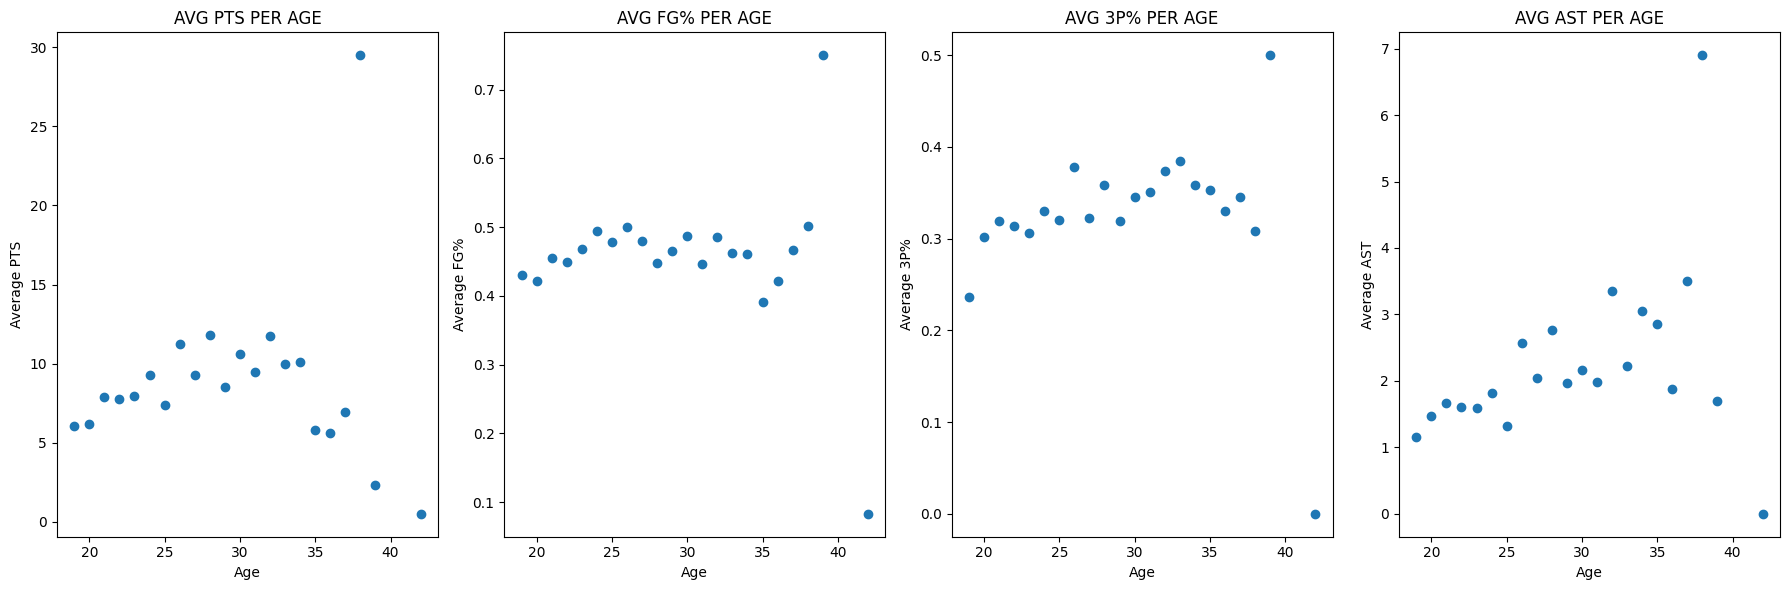

[('PF', 8.77), ('PG', 10.14), ('SF', 8.38), ('C', 8.18), ('SG', 8.58)]
[('PF', 0.49), ('PG', 0.42), ('SF', 0.45), ('C', 0.56), ('SG', 0.44)]
[('PF', 0.33), ('PG', 0.33), ('SF', 0.35), ('C', 0.27), ('SG', 0.36)]
[('PF', 1.52), ('PG', 3.7), ('SF', 1.48), ('C', 1.3), ('SG', 1.8)]


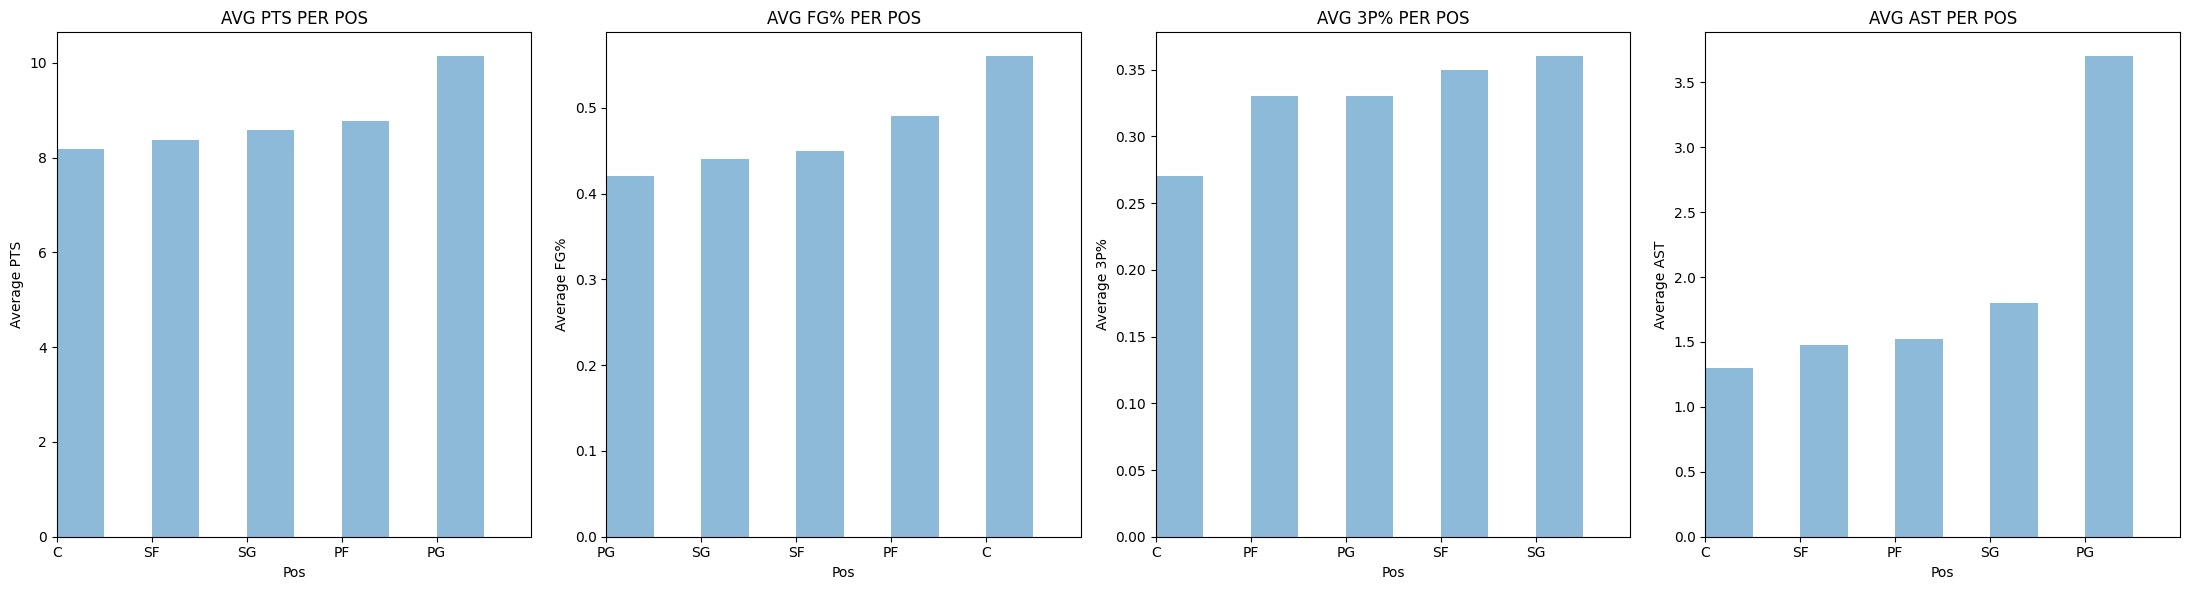

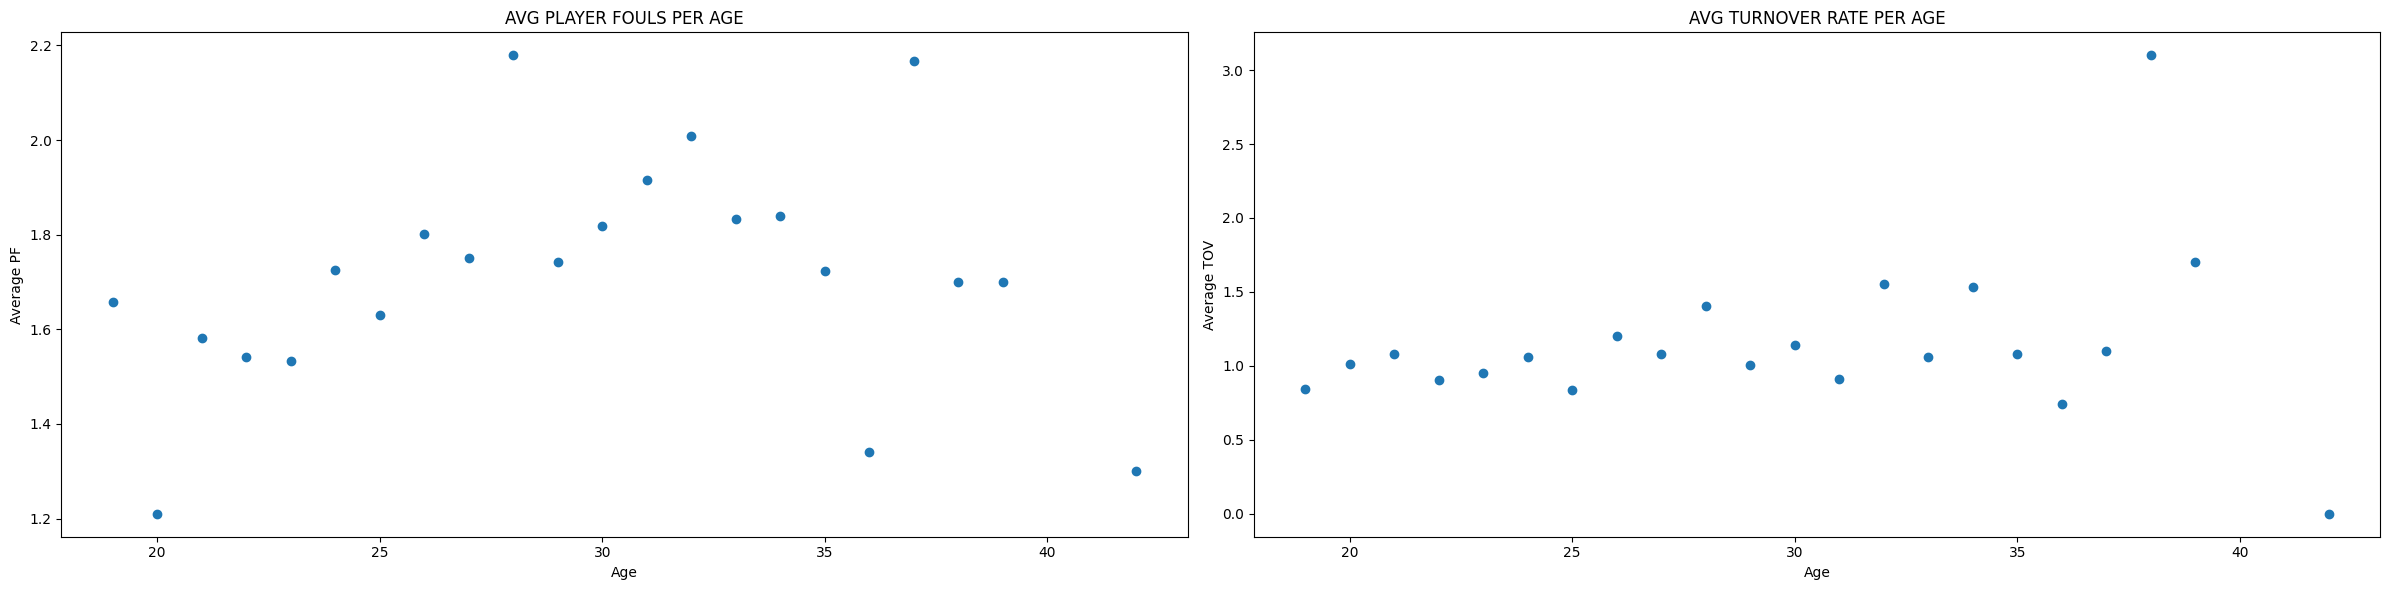

[('PF', 1.76), ('PG', 1.62), ('SF', 1.6), ('C', 2.04), ('SG', 1.52)]
[('PF', 1.0), ('PG', 1.45), ('SF', 0.89), ('C', 0.99), ('SG', 0.99)]


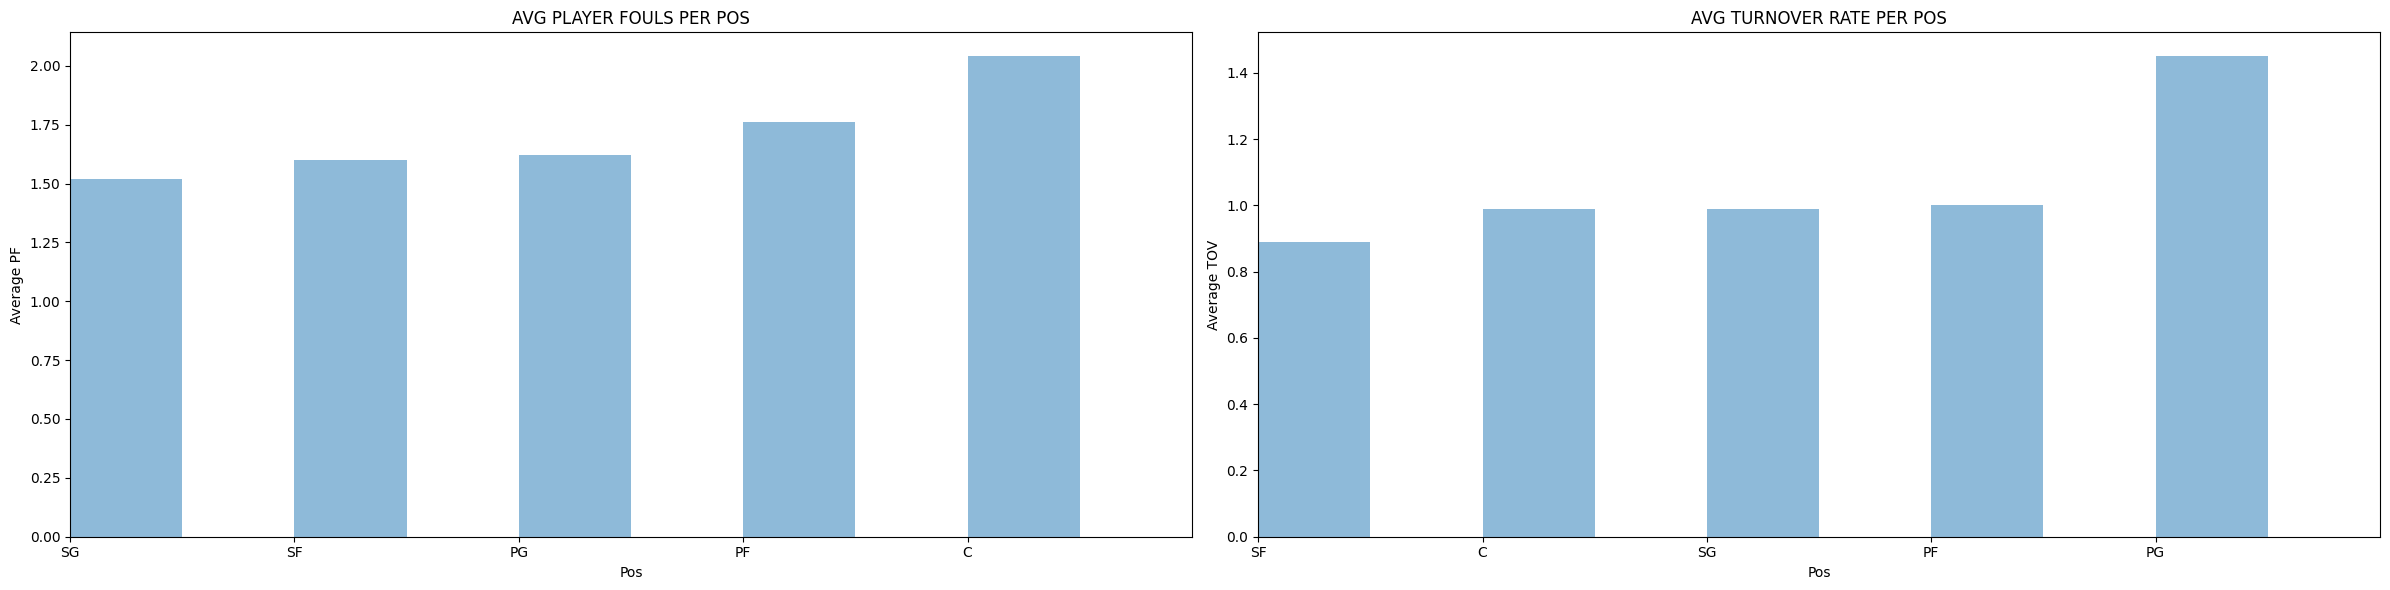

In [ ]:
logFile = "nba_data_processed.csv"  # Should be some file on your system
spark = SparkSession.builder.appName("NBA_Stats").getOrCreate()
logData = spark.read.options(delimeter = ',', header = True).csv(logFile).cache()
logData = logData.withColumn("PTS", logData["PTS"].cast(DoubleType()).alias('PTS'))
logData = logData.withColumn("FG%", logData["FG%"].cast(DoubleType()).alias('FG%'))
logData = logData.withColumn("3P%", logData["3P%"].cast(DoubleType()).alias('3P%'))
logData = logData.withColumn("2P%", logData["2P%"].cast(DoubleType()).alias('2P%'))
logData = logData.withColumn("Age", logData["Age"].cast(IntegerType()).alias('Age'))
logData = logData.withColumn("AST", logData["AST"].cast(DoubleType()).alias('AST'))
logData = logData.withColumn("PF", logData["PF"].cast(DoubleType()).alias('PF'))
logData = logData.withColumn("TOV", logData["TOV"].cast(DoubleType()).alias('TOV'))
logData = logData.withColumn("BLK", logData["BLK"].cast(DoubleType()).alias('BLK'))
logData = logData.withColumn("STL", logData["STL"].cast(DoubleType()).alias('STL'))



#Helps find number of teams for each player
num_teams = logData.select("Player", "Tm").groupBy("Player").count().sort('count', ascending=False).filter(col("count") < 20)
players = logData.select("Player").collect()
player_count = num_teams.collect()

#Gets the players stat
def get_player_stats(player):
    if player != None:
        for p in player_count:
            if player == p[0]:
                count = p[1]
                return count
    return 0

get_player_stats_UDF = udf(lambda x : get_player_stats(x), IntegerType())
teams_player = logData.withColumn('Number of Teams', get_player_stats_UDF(col("Player")))
teams_1 = teams_player.select("Player", "Tm", "Number of Teams", "FG%", "3PA", "3P%", "2P", "2PA", "2P%", "PF", "TOV", "BLK", "STL").filter(col("Number of Teams") == 1)
teams_2 = teams_player.select("Player", "Tm", "Number of Teams", "FG%", "3PA", "3P%", "2P", "2PA", "2P%", "PF", "TOV", "BLK", "STL").filter(col("Number of Teams") >= 2)

#Creates all the plots
plot(teams_1.select("3P%", "3PA").collect(), "3P%", (0, 1), "3PA", (0, 10), "3PA vs 3P% for players who played for 1 team in a season")
plot(teams_2.select("3P%", "3PA").collect(), "3P%", (0, 1), "3PA", (0, 10), "3PA vs 3P% for players who played for 2 teams or more in a season")
plot(teams_1.select("2P%", "2PA").collect(), "2P%", (0, 1), "2PA", (0, 15), "2PA vs 2P% for players who played for 1 team in a season")
plot(teams_2.select("2P%", "2PA").collect(), "2P%", (0, 1), "2PA", (0, 15), "2PA vs 2P% for players who played for 2 teams or more in a season")
plot(teams_1.select("PF", "TOV").collect(), "PF", (0, 6), "TOV", (0, 5), "Fouls vs Turnovers for players who played for 1 team in a season")
plot(teams_2.select("PF", "TOV").collect(), "PF", (0, 6), "TOV", (0, 5), "Fouls vs Turnovers for players who played for 2 teams or more in a season")
plot(teams_1.select("BLK", "STL").collect(), "BLK", (0, 4), "STL", (0, 4), "Blocks vs Steals for players who played for 1 team in a season")
plot(teams_2.select("BLK", "STL").collect(), "BLK", (0, 4), "STL", (0, 4), "Blocks vs Steals for players who played for 2 teams or more in a season")
plot(logData.select("Age", "PTS").collect(), "Age", (0, 40), "PTS", (0, 35), "Age vs PTS for all players")

plot_scoring_by_age(logData)
plot_scoring_by_pos(logData)
plot_negatives_by_age(logData)
plot_negatives_by_pos(logData)


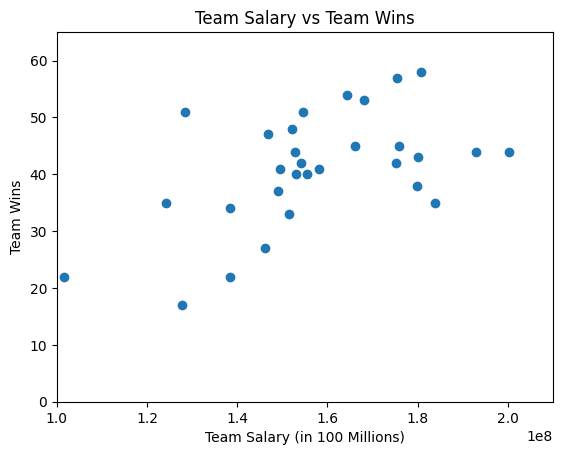

In [ ]:
# Load Session/CSV File
logFile = "nba_team_stats.csv"
spark = SparkSession.builder.appName("NBA_Contracts").getOrCreate()
logData = spark.read.options(delimeter = ',', header = True).csv(logFile).cache()

# Get the Columns We Want to Analyze
#Convert data from strings to ints or doubles
logData = logData.withColumn("Salary", logData["Salary"].cast(DoubleType()).alias('Salary'))
logData = logData.withColumn("Wins", logData["Wins"].cast(IntegerType()).alias('Wins'))

#Plots the teams salary spent vs wins
def plot_team_wins_vs_salary(df):
  stats = df.collect()
  x = []
  y = []
  for team in stats:
    x.append(team[1])
    y.append(team[2])
  plt.xlim((100000000, 210000000))
  plt.ylim((0, 65))
  plt.scatter(np.array(y), np.array(x))
  plt.title("Team Salary vs Team Wins")
  plt.xlabel("Team Salary (in 100 Millions)")
  plt.ylabel("Team Wins")
  plt.show()


plot_team_wins_vs_salary(logData)

# Multiple Names Show up here, each for a new contract
# Also, there is no team data here, so if we want to plot total spend vs. team wins, we'd have to link
# the 2 datasets' data

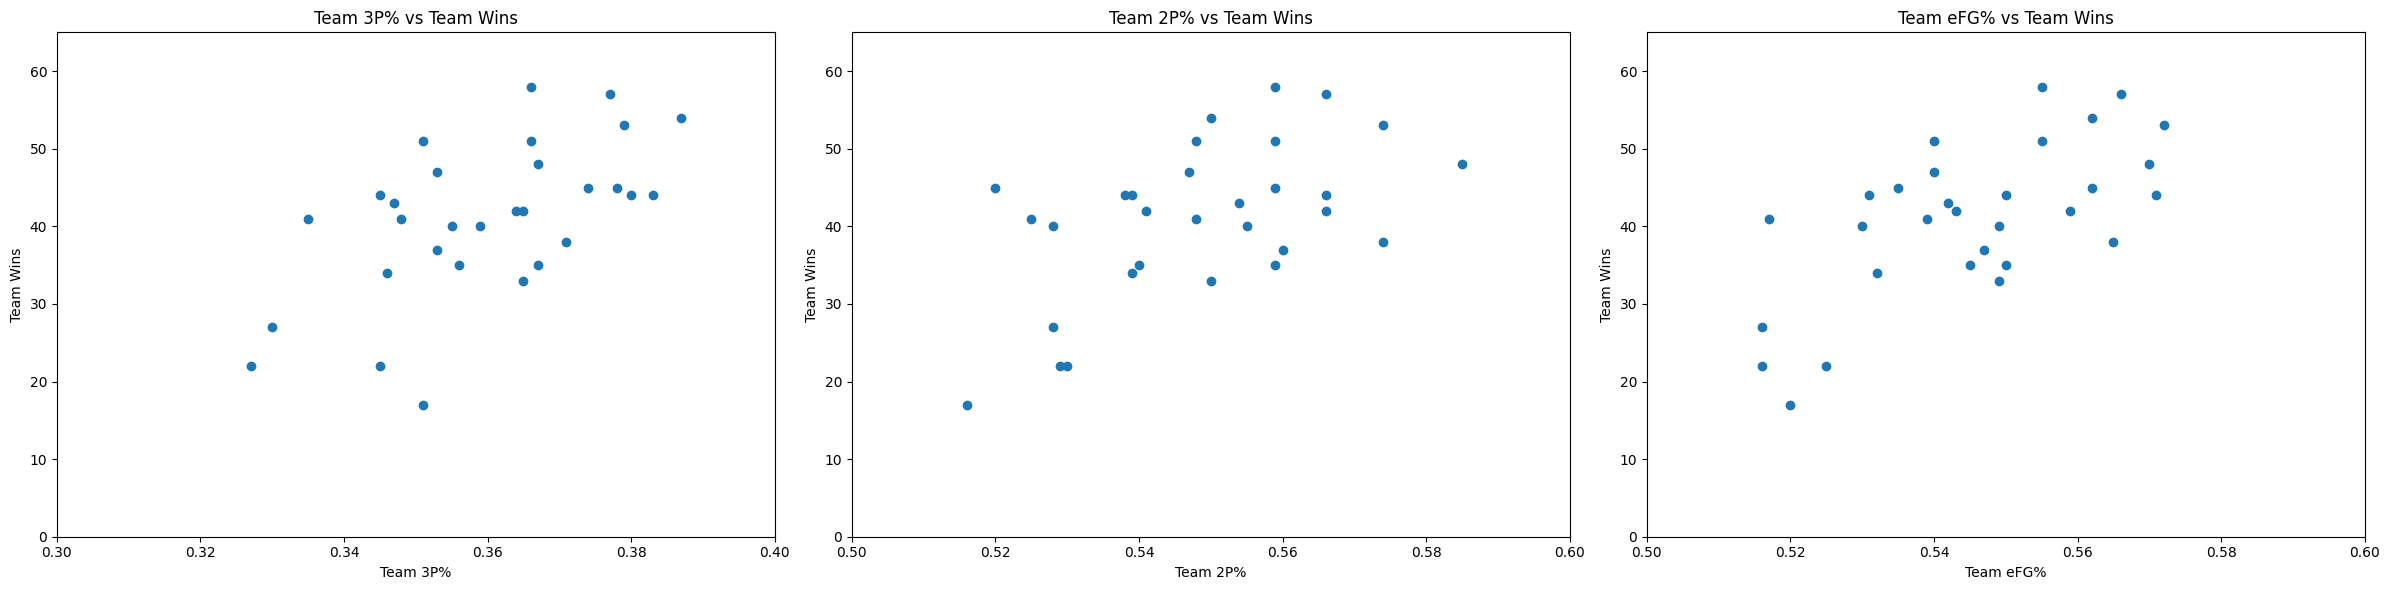

In [ ]:
'''

Plots of Team Wins vs. Total 3P%, Team Wins vs. Total 2P%, Team Wins vs. Total eFG%

'''

# Extract all Team data on shooting percentages
# Load Session/CSV File
logFile = "nba_team_stats.csv"
spark = SparkSession.builder.appName("NBA_Contracts").getOrCreate()
logData = spark.read.options(delimeter = ',', header = True).csv(logFile).cache()

# Get the Columns We Want to Analyze into ints and doubles
logData = logData.withColumn("Salary", logData["Salary"].cast(DoubleType()).alias('Salary'))
logData = logData.withColumn("Wins", logData["Wins"].cast(IntegerType()).alias('Wins'))
logData = logData.withColumn("3P%", logData["3P%"].cast(DoubleType()).alias('3P%'))
logData = logData.withColumn("2P%", logData["2P%"].cast(DoubleType()).alias('2P%'))
logData = logData.withColumn("eFG%", logData["eFG%"].cast(DoubleType()).alias('eFG%'))

#Graph the specific team graphs
def team_graphs(df):
  stat = ['3P%', '2P%', 'eFG%']
  fig, graph = plt.subplots(nrows=1, ncols=3, figsize=(24, 6))
  data = df.collect()
  for s in range(len(stat)):
    x = []
    y = []
    for team in data:
      x.append(team[s+3])
      y.append(team[1])
    if s == 0:
      graph[s].set_xlim((0.3, 0.4))
    else:
      graph[s].set_xlim((0.5, 0.6))
    graph[s].set_ylim((0, 65))
    graph[s].scatter(np.array(x), np.array(y))
    graph[s].set_title("Team " + str(stat[s]) + " vs Team Wins")
    graph[s].set_xlabel("Team " + str(stat[s]))
    graph[s].set_ylabel("Team Wins")
  plt.tight_layout()
  plt.show()



team_graphs(logData)

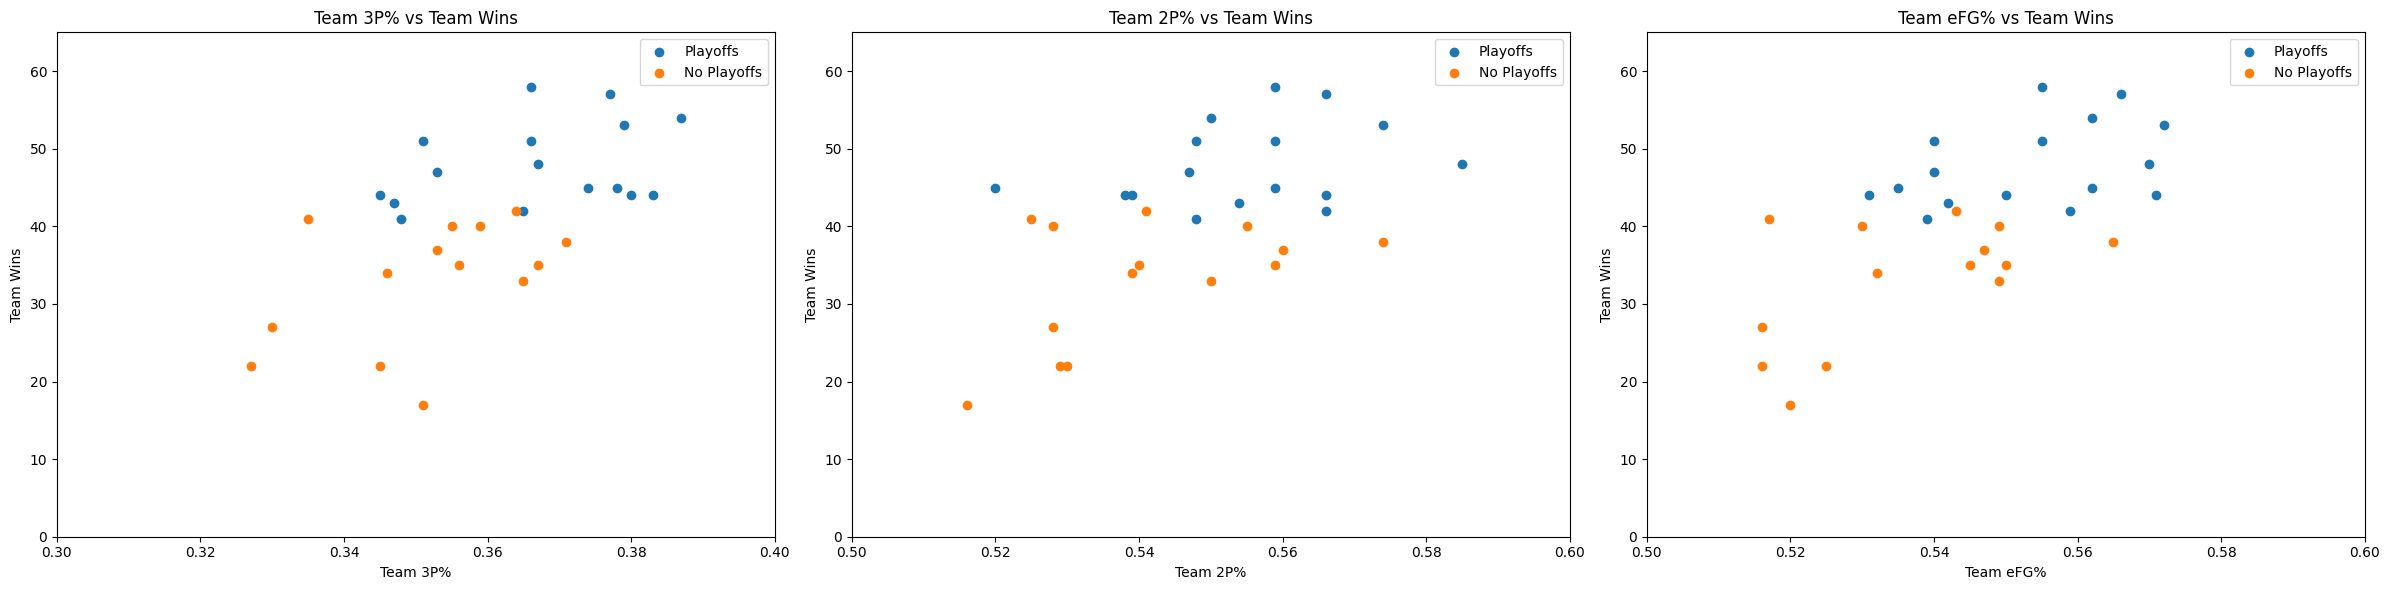

+----+------------------+
|Team|          3P%_Wins|
+----+------------------+
| MIL|0.6310344827586207|
| BOS|0.6614035087719299|
| MEM| 0.688235294117647|
| DEN|0.7150943396226415|
| PHI|0.7166666666666667|
| CLE|0.7176470588235294|
| NYK| 0.751063829787234|
| SAC|0.7645833333333334|
| MIA|0.7840909090909091|
| LAL|0.8069767441860464|
| TOR|0.8170731707317073|
| PHO|0.8311111111111111|
| BRK|              0.84|
| ATL| 0.848780487804878|
| LAC|0.8636363636363636|
| NOP|0.8666666666666666|
| MIN|0.8690476190476191|
| GSW|0.8704545454545454|
| OKC|            0.8875|
| CHI|            0.8975|
| UTA| 0.954054054054054|
| DAL|0.9763157894736842|
| WAS|1.0171428571428571|
| ORL|1.0176470588235293|
| IND|1.0485714285714287|
| POR| 1.106060606060606|
| CHA|1.2222222222222223|
| HOU|1.4863636363636366|
| SAS|1.5681818181818181|
| DET| 2.064705882352941|
+----+------------------+

+----+----+
|Team|Wins|
+----+----+
| MIL|  58|
| BOS|  57|
| PHI|  54|
| DEN|  53|
| MEM|  51|
| CLE|  51|
| SAC| 

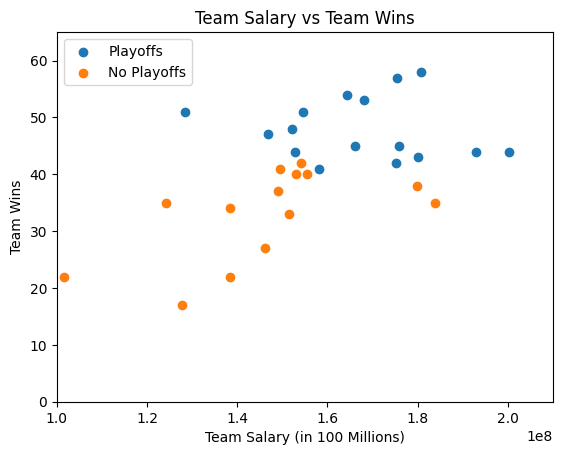

+----+--------+------------------+
|Team|Playoffs|          3P%_Wins|
+----+--------+------------------+
| MIL|     1.0|0.6310344827586207|
| BOS|     1.0|0.6614035087719299|
| MEM|     1.0| 0.688235294117647|
| DEN|     1.0|0.7150943396226415|
| PHI|     1.0|0.7166666666666667|
| CLE|     1.0|0.7176470588235294|
| NYK|     1.0| 0.751063829787234|
| SAC|     1.0|0.7645833333333334|
| MIA|     1.0|0.7840909090909091|
| LAL|     1.0|0.8069767441860464|
| TOR|     0.0|0.8170731707317073|
| PHO|     1.0|0.8311111111111111|
| BRK|     1.0|              0.84|
| ATL|     1.0| 0.848780487804878|
| LAC|     1.0|0.8636363636363636|
| NOP|     0.0|0.8666666666666666|
| MIN|     1.0|0.8690476190476191|
| GSW|     1.0|0.8704545454545454|
| OKC|     0.0|            0.8875|
| CHI|     0.0|            0.8975|
| UTA|     0.0| 0.954054054054054|
| DAL|     0.0|0.9763157894736842|
| WAS|     0.0|1.0171428571428571|
| ORL|     0.0|1.0176470588235293|
| IND|     0.0|1.0485714285714287|
| POR|     0.0| 1.10

In [ ]:
#Experimental Results
def team_graphs(df):
  stat = ['3P%', '2P%', 'eFG%']
  fig, graph = plt.subplots(nrows=1, ncols=3, figsize=(24, 6))
  data = df.collect()
  for s in range(len(stat)):
    x = []
    y = []
    x_no = []
    y_no = []
    for team in data:
      if(team[6] == 1):
        x.append(team[s+3])
        y.append(team[1])
      elif(team[6] == 0):
        x_no.append(team[s+3])
        y_no.append(team[1])
    if s == 0:
      graph[s].set_xlim((0.3, 0.4))
    else:
      graph[s].set_xlim((0.5, 0.6))
    graph[s].set_ylim((0, 65))
    graph[s].scatter(np.array(x), np.array(y))
    graph[s].scatter(np.array(x_no), np.array(y_no))
    graph[s].set_title("Team " + str(stat[s]) + " vs Team Wins")
    graph[s].set_xlabel("Team " + str(stat[s]))
    graph[s].set_ylabel("Team Wins")
    graph[s].legend(["Playoffs", "No Playoffs"])
  plt.tight_layout()
  plt.show()

logData = logData.withColumn("Playoffs", logData["Playoffs"].cast(DoubleType()).alias('Playoffs'))
team_graphs(logData)

#Define column that is 3P% * 100 /TeamWIns
logData = logData.withColumn("3P%_Wins", logData["3P%"]*100/logData["Wins"]).sort('3P%_Wins', ascending=True)

#Make new df with just team name column and 3P%_Wins column
predictions = logData.select("Team", "3P%_Wins")
predictions.show(30)

truth = logData.select("Team", "Wins").sort('Wins', ascending=False)
truth.show(30)

def plot_team_wins_vs_salary_pred(df):
  stats = df.collect()
  x = []
  y = []
  x_no = []
  y_no = []
  for team in stats:
    if(team[6] == 1):
      x.append(team[1])
      y.append(team[2])
    elif(team[6] == 0):
      x_no.append(team[1])
      y_no.append(team[2])
  plt.xlim((100000000, 210000000))
  plt.ylim((0, 65))
  plt.scatter(np.array(y), np.array(x))
  plt.scatter(np.array(y_no), np.array(x_no))
  plt.title("Team Salary vs Team Wins")
  plt.xlabel("Team Salary (in 100 Millions)")
  plt.ylabel("Team Wins")
  plt.legend(["Playoffs", "No Playoffs"])
  plt.show()

plot_team_wins_vs_salary_pred(logData)

y = logData.select("Team", "Playoffs", "3P%_Wins").sort('3P%_Wins', ascending=True)
y.show(30)
